# TensorFlowVST : Examples models

A valid model must :
* have a (None, 1) shape and the same shape for input and output
* output values between -1.0 and 1.0
* use [frugally-deep](https://github.com/Dobiasd/frugally-deep) supported layers

In [1]:
import random

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

In [2]:
signal_440hz = np.sin(2 * np.pi * 440 * np.arange(480) / 44100)

1. gain / 2

[array([[[0.5]]], dtype=float32), array([0.], dtype=float32)]


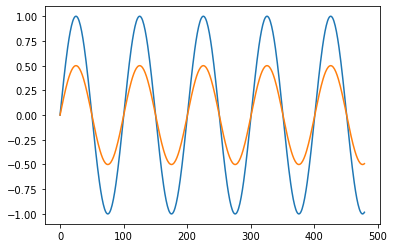

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(1, 1, input_shape=(None, 1), padding='same')
])
model.layers[0].set_weights([np.array([[[0.5]]], dtype=np.float32), np.array([0.], dtype=np.float32)])
print(model.layers[0].get_weights())

z = model.predict(np.expand_dims(signal_440hz, [0, -1]))[0,:,0]

# result
plt.plot(np.arange(480), signal_440hz, z)
plt.show()

In [4]:
model.save('tf_model_gain_d2.h5', include_optimizer=False)

2. gain * 2

[array([[[2.]]], dtype=float32), array([0.], dtype=float32)]


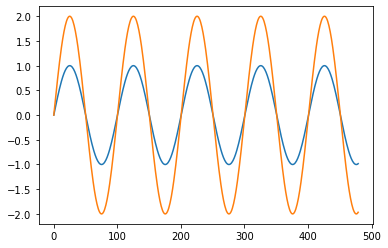

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(1, 1, input_shape=(None, 1), padding='same')
])
model.layers[0].set_weights([np.array([[[2.0]]], dtype=np.float32), np.array([0.], dtype=np.float32)])
print(model.layers[0].get_weights())

z = model.predict(np.expand_dims(signal_440hz, [0, -1]))[0,:,0]

# result
plt.plot(np.arange(480), signal_440hz, z)
plt.show()

In [6]:
model.save('tf_model_gain_m2.h5', include_optimizer=False)

3. gain / 2 (learned on sin)

Epoch 1/10
256/256 [==============================] - 29s 107ms/step - loss: 0.0060
Epoch 2/10
256/256 [==============================] - 28s 108ms/step - loss: 1.2086e-04
Epoch 3/10
256/256 [==============================] - 28s 108ms/step - loss: 9.9615e-05
Epoch 4/10
256/256 [==============================] - 28s 108ms/step - loss: 7.4177e-05
Epoch 5/10
256/256 [==============================] - 28s 108ms/step - loss: 1.4216e-04
Epoch 6/10
256/256 [==============================] - 28s 108ms/step - loss: 8.6521e-05
Epoch 7/10
256/256 [==============================] - 28s 108ms/step - loss: 3.9699e-05
Epoch 8/10
256/256 [==============================] - 28s 108ms/step - loss: 9.8343e-05
Epoch 9/10
256/256 [==============================] - 28s 108ms/step - loss: 5.8522e-05
Epoch 10/10
256/256 [==============================] - 28s 108ms/step - loss: 8.0142e-05


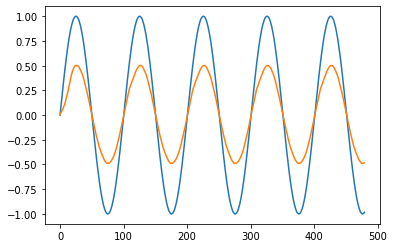

In [7]:
def generator(samples=16384, channels=1, batch_size=32):
  batch_signal_1 = np.zeros(shape=(batch_size, samples, channels), dtype=np.float32)
  batch_signal_2 = np.zeros(shape=(batch_size, samples, channels), dtype=np.float32)
  sampling_rate = 44100

  while True:
    for batch in range(batch_size):
      for chan in range(channels):
        freq = random.triangular(20, 20000, 880)
        x = np.arange(samples)
        y = np.sin(2 * np.pi * freq * x / sampling_rate)

        batch_signal_2[batch, :, chan] = y/(2+random.uniform(0, 5))
      batch_signal_1 = batch_signal_2*2

    yield batch_signal_1, batch_signal_2


model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 9, input_shape=(None, 1), padding='causal'),
    tf.keras.layers.Conv1D(32, 9, activation='relu', padding='causal'),
    tf.keras.layers.Conv1D(32, 9, activation='relu', padding='causal'),
    tf.keras.layers.Conv1D(1, 9, padding='causal')
])

gen = generator()
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError())

model.fit(gen, epochs=10, steps_per_epoch=256)

z = model.predict(np.expand_dims(signal_440hz, [0, -1]))[0,:,0]

# result
plt.plot(np.arange(480), signal_440hz, z)
plt.show()

In [8]:
model.save('tf_model_gain_d2_learned.h5', include_optimizer=False)

4. random model

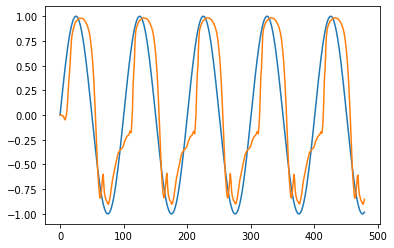

In [9]:
'''
kernel_initializer = 'HeNormal'
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 9, input_shape=(None, 1), padding='causal', kernel_initializer=kernel_initializer),
    tf.keras.layers.Conv1D(32, 9, activation='relu', padding='causal', kernel_initializer=kernel_initializer),
    tf.keras.layers.Conv1D(32, 9, activation='relu', padding='causal', kernel_initializer=kernel_initializer),
    tf.keras.layers.Conv1D(32, 9, activation='relu', padding='causal', kernel_initializer=kernel_initializer),
    tf.keras.layers.Conv1D(1, 9, activation='tanh', padding='causal', kernel_initializer=kernel_initializer)
])
'''

model = tf.keras.models.load_model('tf_model_random_01.h5')

z = model.predict(np.expand_dims(signal_440hz, [0, -1]))[0,:,0]

# result
plt.plot(np.arange(480), signal_440hz, z)
plt.show()

In [10]:
model.save('tf_model_random_01.h5', include_optimizer=False)

5. random model (larger +/- 200k params)

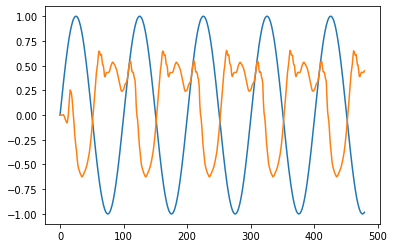

In [11]:
'''
kernel_initializer = 'HeNormal'
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, 9, input_shape=(None, 1), padding='causal', kernel_initializer=kernel_initializer),
    tf.keras.layers.Conv1D(128, 9, activation='relu', padding='causal', kernel_initializer=kernel_initializer),
    tf.keras.layers.Conv1D(128, 9, activation='relu', padding='causal', kernel_initializer=kernel_initializer),
    tf.keras.layers.Conv1D(1, 9, activation='tanh', padding='causal', kernel_initializer=kernel_initializer)
])
'''

model = tf.keras.models.load_model('tf_model_random_02.h5')

z = model.predict(np.expand_dims(signal_440hz, [0, -1]))[0,:,0]

# result
plt.plot(np.arange(480), signal_440hz, z)
plt.show()

In [12]:
model.save('tf_model_random_02.h5', include_optimizer=False)